In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
data = pd.read_csv('../Measurements/tracking_latency/checking.csv')

set the starting time of the receording to 0

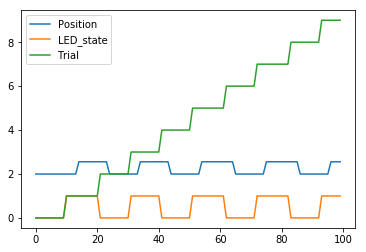

In [94]:
data[['Position', 'LED_state', 'Trial']][:100].plot()

In [95]:
data.Time -= data.Time.min()
data.Time *= 1000

In [96]:
data.Time.max() / 1000

114.34345575505479

In [97]:
data.index = data.Time # change time to ms

In [98]:
# data

In [99]:
data['TrialTime'] = data.groupby('Trial').Time.apply(lambda x: x-x.min())

In [100]:
# data.TrialTime[data.Trial == 20]

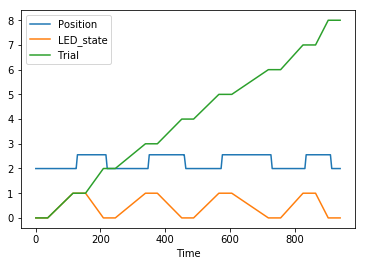

In [101]:
data[['Position', 'LED_state', 'Trial']][:1000].plot()

Bring down the positon value to zero

In [102]:
data.Position -= data.Position.min()

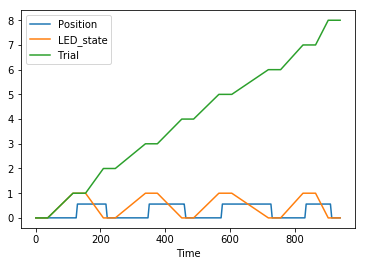

In [103]:
data[['Position', 'LED_state', 'Trial']][:1000].plot()

Make the position values between 0 and 5

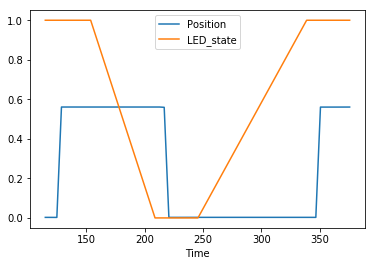

In [104]:
data[['Position', 'LED_state']][40:450].plot()

c:\users\sirotalab\miniconda3\envs\vrlatency\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


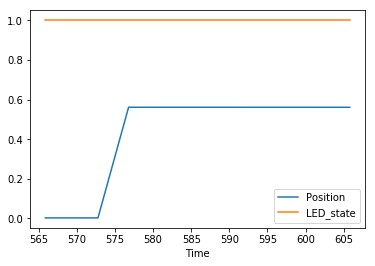

In [105]:
data[data.Trial == 5].plot(y=['Position', 'LED_state'])

In [106]:
threshold = (data.Position.max() - data.Position.min()) / 2 
threshold

0.2812514454126358

In [107]:
data['FrameOn'] = data['Position'] > threshold

In [108]:
# trial_no = 6
# data[data.Trial == trial_no].plot(y=['Position', 'LED_state'])
# data.FrameOn[data.Trial == trial_no]

In [109]:
resp_on = data[((data['LED_state'] == 0) & (data['FrameOn'] == False)) | ((data['LED_state'] == 1) & (data['FrameOn'] == True))]

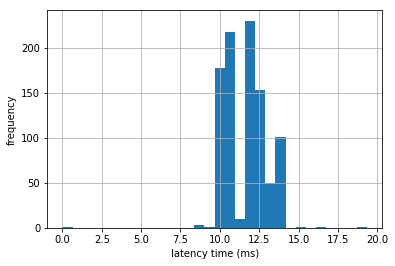

In [110]:
latency = resp_on.groupby('Trial').TrialTime.min()
(latency).hist(bins=30).set(xlabel='latency time (ms)', ylabel='frequency')
plt.show()

In [299]:
data

,Time,Position,Trial,LED_state,TrialTime,FrameOn
Time,,,,,,
0.000000,0.000000,0.002378,0.0,0.0,0.000000,False
4.184100,4.184100,0.002270,0.0,0.0,4.184100,False
8.368201,8.368201,0.002311,0.0,0.0,8.368201,False
12.552301,12.552301,0.002271,0.0,0.0,12.552301,False
16.736402,16.736402,0.002213,0.0,0.0,16.736402,False
20.920502,20.920502,0.002171,0.0,0.0,20.920502,False
25.104603,25.104603,0.002180,0.0,0.0,25.104603,False
29.288703,29.288703,0.002144,0.0,0.0,29.288703,False
33.472803,33.472803,0.002176,0.0,0.0,33.472803,False
